In [5]:
import pandas as pd
import seaborn as sns

In [45]:
df = pd.read_csv('data/modified/data_to_map.csv')

In [46]:
# remove junk from coords
df['coords'] = df['coords'].str.replace('(', '').str.replace(')', '')

# Split the tuple column 'coords' into two separate columns 'latitude' and 'longitude'
df[['latitude','longitude']] = df['coords'].str.split(',', expand=True)
# set data type
df = df.astype({'latitude':'float64', 'longitude':'float64'})

# Drop the original 'coords' column
df.drop('coords', axis=1, inplace=True)

C:\Users\johnd_h4rxswp\AppData\Local\Temp\ipykernel_2024\344440211.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['coords'] = df['coords'].str.replace('(', '').str.replace(')', '')


In [47]:
min_val = df['weight'].min()

In [48]:
# max all weights positive
df['weight'] = df['weight'] + (min_val*-1)

In [49]:
df.head()

,Unnamed: 0,weight,latitude,longitude
0,0,679,44.291795,-93.304599
1,1,676,44.878718,-93.381030
2,2,620,45.117080,-93.216415
3,3,742,43.643533,-93.364793
4,4,753,44.068943,-92.476380


In [50]:
# TODO code to fiddle with
# https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html

In [51]:
# read in county data
import geopandas as gpd
import matplotlib.pyplot as plt

shp_df = gpd.read_file('data/original/Hennepin_County_Boundary/Hennepin_County_Boundary.shp')

In [52]:
shp_df.crs

<Projected CRS: EPSG:26915>
Name: NAD83 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 96°W to 90°W and NAD83 by country
- bounds: (-96.0, 25.61, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

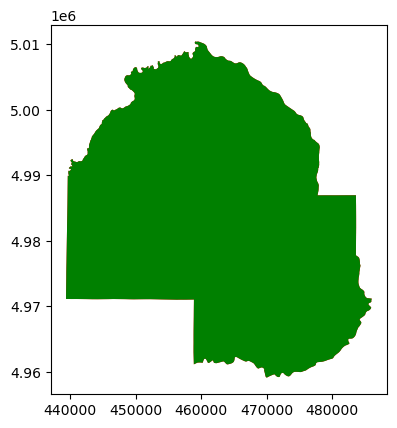

In [53]:
# create 2km buffer around hennepin county
# buff_henn = shp_df.buffer(2000)
ax = shp_df.plot(color='red')

shp_df.plot(ax=ax, color='green')
plt.show()



In [54]:
# see which lat/longs are within
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude'], crs="EPSG:4326"))
gdf.to_crs(26915, inplace=True)

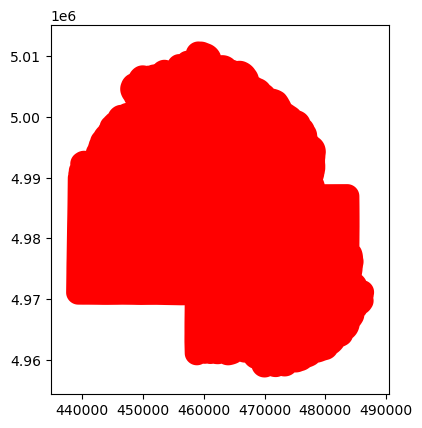

In [55]:
tmp_df = shp_df

# create 2km buffer around hennepin county
tmp_df['geometry'] = shp_df.buffer(2000)
ax = tmp_df['geometry'].plot(color='red')

plt.show()


In [56]:
filtered_df = gpd.sjoin(gdf, tmp_df)

In [57]:
filtered_df.shape

(1844, 11)

In [58]:
filtered_df.head()

,Unnamed: 0,weight,latitude,longitude,geometry,index_right,OBJECTID,FEATURECOD,NAME_TXT,ShapeSTAre,ShapeSTLen
1,1,676,44.878718,-93.381030,POINT (469905.719 4969548.271),0,1,NaN,HENNEPIN COUNTY,1.569960e+09,190077.891439
5,5,630,44.903262,-93.482438,POINT (461912.599 4972317.287),0,1,NaN,HENNEPIN COUNTY,1.569960e+09,190077.891439
6,6,652,44.903262,-93.482438,POINT (461912.599 4972317.287),0,1,NaN,HENNEPIN COUNTY,1.569960e+09,190077.891439
7,7,674,44.964563,-93.246122,POINT (480589.852 4979043.272),0,1,NaN,HENNEPIN COUNTY,1.569960e+09,190077.891439
19,19,671,44.945341,-93.210965,POINT (483356.898 4976900.153),0,1,NaN,HENNEPIN COUNTY,1.569960e+09,190077.891439


In [28]:
import geoplot

ax = geoplot.kdeplot(
    filtered_df, clip=filtered_df.geometry,
    fill=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea(), weights=filtered_df.weight)
geoplot.polyplot(filtered_df, ax=ax, zorder=1)

ModuleNotFoundError: No module named 'geoplot'